In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology
from skimage.io import imread, imsave
from skimage.segmentation import flood, flood_fill
import pyclesperanto_prototype as cle

In [2]:
cle.select_device()
print("Used GPU: " + cle.get_device().name)

Used GPU: Tesla V100-PCIE-32GB


In [18]:
im_data = imread('/home2/kdean/Desktop/canny-1.tif')
im_data = np.array(im_data)
im_data = np.int8(im_data)

print("Loaded Image Size: " + str(im_data.shape))

Loaded Image Size: (511, 866, 814)


In [19]:
input = cle.push(im_data)
print("Image size in GPU: " + str(input.shape))

Image size in GPU: (511, 866, 814)


In [20]:
# Noise Removal
image1 = cle.create_like(im_data)
blurred = cle.gaussian_blur(im_data, image1, 1, 1, 1)
blurred = cle.pull(image1)

In [20]:
# Background Removal


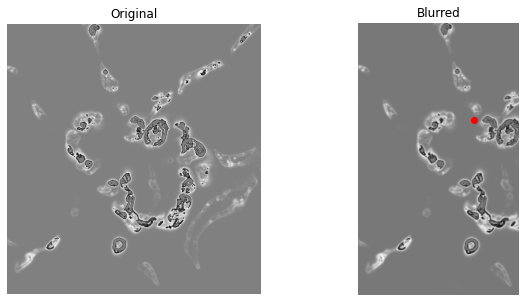

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(im_data[224,:,:], cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(image1[224,:,:], cmap=plt.cm.gray)
ax[1].plot(369, 308, 'ro')  # seed point
ax[1].set_title('Blurred')
ax[1].axis('off')
plt.show()

(814, 866, 511)


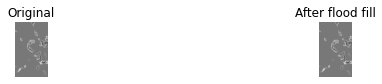

In [26]:
# Flood Fill
print(np.shape(blurred))
filled_image = flood_fill(blurred, (0, 0, 0), 0, tolerance=5)

fig, ax = plt.subplots(ncols=2, figsize=(10, 1))
ax[0].imshow(blurred[224,:,:], cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(filled_image[224,:,:], cmap=plt.cm.gray)
# ax[1].plot(369, 308, 'ro')  # seed point
ax[1].set_title('After flood fill')
ax[1].axis('off')

plt.show()
imsave("/home2/kdean/Desktop/filled.tif",filled_image)